**kmeans.fit(X)**
-- Fits the KMeans model to the data X.


-- Computes cluster centers (centroids).

-- Assigns each point to a cluster internally, but does not return the cluster labels.

-- Output: Nothing (returns the model itself with fitted parameters).

-- To get labels: Use `kmeans.labels_` after fitting.

**kmeans.fit_predict(X)**

-- Combines fitting and predicting.

-- Additionally, returns the predicted cluster labels for each point in X.

-- Output: An array of cluster labels.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs # Import make_blobs
from sklearn.cluster import KMeans # Import KMeans
from scipy.stats import mode # Import mode
from sklearn.metrics import accuracy_score # Import accuracy_score
import pandas as pd # Import pandas
import numpy as np # Import numpy


# Small toy dataset with 3 true classes
X, y_true = make_blobs(n_samples=90, centers=3, cluster_std=0.70, random_state=0)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=42)

# Fit KMeans on the training data
kmeans = KMeans(n_clusters=3, random_state=42)
y_train_pred = kmeans.fit_predict(X_train)

# Build mapping from predicted cluster → true label (on training set)
def get_cluster_label_mapping(y_true_train, y_pred_train):
    mapping = {}
    for cluster in np.unique(y_pred_train):
        mask = (y_pred_train == cluster)
        mapped_label = mode(y_true_train[mask], keepdims=True).mode[0]
        mapping[cluster] = mapped_label
    return mapping

cluster_to_label = get_cluster_label_mapping(y_train, y_train_pred)

# Predict on test data and apply mapping
y_test_pred_clusters = kmeans.predict(X_test)
y_test_pred_labels = np.array([cluster_to_label[cluster] for cluster in y_test_pred_clusters])

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred_labels)

# Show mapping and result
results_df = pd.DataFrame({
    "Cluster": list(cluster_to_label.keys()),
    "Mapped Label": list(cluster_to_label.values())
})
results_df["Used for"] = "Train → for mapping"

display(results_df)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy}")


,Cluster,Mapped Label,Used for
0,0,0,Train → for mapping
1,1,1,Train → for mapping
2,2,2,Train → for mapping


Test Accuracy: 0.9629629629629629


In [2]:
# Show which true labels were assigned to each cluster in training data
from collections import Counter

# For each cluster in training data, show the distribution of true labels
cluster_label_distribution = {}
for cluster in np.unique(y_train_pred):
    mask = (y_train_pred == cluster)
    true_labels_in_cluster = y_train[mask]
    label_counts = dict(Counter(true_labels_in_cluster))
    cluster_label_distribution[cluster] = label_counts

# Convert to DataFrame for display
dist_df = pd.DataFrame.from_dict(cluster_label_distribution, orient='index').fillna(0).astype(int)
dist_df.index.name = 'Cluster'
dist_df.columns.name = 'True Label'

display(dist_df)  # Use display from IPython.display



True Label,0,1,2
Cluster,,,
0,20,0,0
1,1,20,0
2,0,0,22


Cluster 2 was mapped to label 0 because, during training, all the data points in Cluster 2 had true label 0 (21 out of 21 points). This majority voting approach ensures each cluster gets assigned the most representative label.

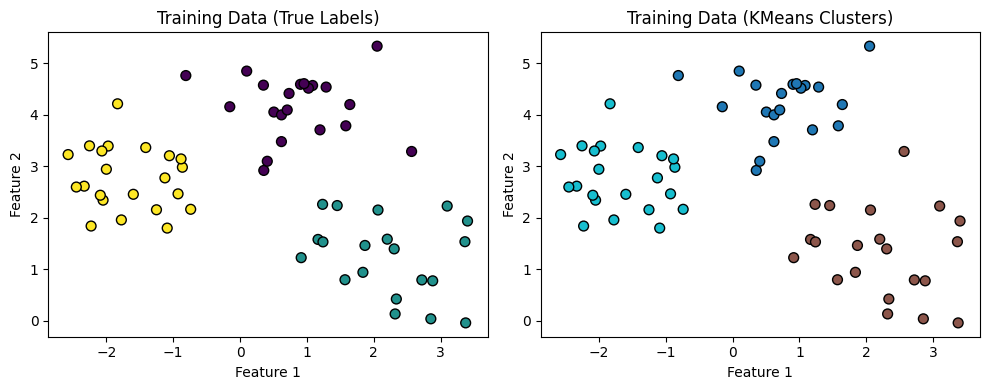

In [3]:
import matplotlib.pyplot as plt

# Plot training data with true labels
plt.figure(figsize=(10, 4))

# Plot 1: Training data with true labels
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title("Training Data (True Labels)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot 2: Training data with predicted clusters
plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred, cmap='tab10', edgecolor='k', s=50)
plt.title("Training Data (KMeans Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


In [5]:
# Step 3: Evaluate clustering performance
import sklearn
ari = sklearn.metrics.adjusted_rand_score(y_train, y_train_pred)

sil_score = sklearn.metrics.silhouette_score(X_train, y_train_pred)

# Step 4: Print results
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print(f"Silhouette Score: {sil_score:.4f}")

Adjusted Rand Index (ARI): 0.9532


NameError: name 'nmi' is not defined

# code example using 2 true labels and 4 KMeans clusters

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs # Import make_blobs
from sklearn.cluster import KMeans # Import KMeans
from scipy.stats import mode # Import mode
from sklearn.metrics import accuracy_score # Import accuracy_score
import pandas as pd # Import pandas
import numpy as np # Import numpy
#Import the adjusted_rand_score and normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Generate toy data with 2 true classes
X, y_true = make_blobs(n_samples=200, centers=2, cluster_std=1.0, random_state=42)

# Apply KMeans with k = 4 clusters (overclustering)
kmeans_over = KMeans(n_clusters=4, random_state=42)
y_pred_clusters = kmeans_over.fit_predict(X)

# Mapping each cluster to the most frequent true label
def map_clusters_to_labels_overclustering(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for cluster in np.unique(y_pred):
        mask = (y_pred == cluster)
        labels[mask] = mode(y_true[mask], keepdims=True).mode[0]
    return labels

# Map and compute accuracy
y_pred_mapped = map_clusters_to_labels_overclustering(y_true, y_pred_clusters)
accuracy = accuracy_score(y_true, y_pred_mapped)
ari = adjusted_rand_score(y_true, y_pred_clusters)
nmi = normalized_mutual_info_score(y_true, y_pred_clusters)

# Label distribution per cluster
from collections import Counter
cluster_label_distribution = {}
for cluster in np.unique(y_pred_clusters):
    mask = (y_pred_clusters == cluster)
    true_labels = y_true[mask]
    label_counts = dict(Counter(true_labels))
    cluster_label_distribution[cluster] = label_counts

# Prepare display tables
distribution_df = pd.DataFrame.from_dict(cluster_label_distribution, orient='index').fillna(0).astype(int)
distribution_df.index.name = 'Cluster'
distribution_df.columns.name = 'True Label'

results_df = pd.DataFrame({
    "Metric": ["Accuracy (after mapping)", "Adjusted Rand Index (ARI)", "Normalized Mutual Information (NMI)"],
    "Score": [accuracy, ari, nmi]
})

print(results_df)
print(distribution_df)

                                Metric     Score
0             Accuracy (after mapping)  1.000000
1            Adjusted Rand Index (ARI)  0.706999
2  Normalized Mutual Information (NMI)  0.743133
True Label   1    0
Cluster            
0           12    0
2           35    0
3           53    0
1            0  100


True Label Distribution per Cluster – showing how each of the 4 clusters corresponds to the 2 true labels.

Evaluation Metrics – even though mapped accuracy is 100%, more reliable indicators like ARI and NMI reflect the nuance due to overclustering.

**Why is Adjusted Rand Index (ARI) low even when Accuracy = 1.0?**

Adjusted Rand Index (ARI) compares the agreement between two clusterings (true vs predicted) without remapping labels and corrects for chance.

It penalizes:

Overclustering: When k > number of true classes, multiple clusters may correspond to the same class — and ARI will consider this as fragmentation.

Label mismatch: It doesn’t just reward matching labels but checks pairwise similarity:

For every pair of points, ARI checks whether they are:

in the same cluster in both y_true and y_pred

or in different clusters in both.

*  ARI < 1:True labels: {0, 1}

- Predicted clusters: {0, 1, 2, 3} (oversegmentation of actual classes)

- ARI sees this as:

-- Some points that should be in the same group (same true label) are now split into different clusters → false negatives

-- Some points that shouldn’t be in the same group (different true labels) but end up in same cluster → false positives

-- Even if remapping makes it look perfect, overclustering disturbs pairwise agreement, which ARI detects.

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
y_pred = kmeans.fit_predict(X)

# Step 3: Evaluate clustering performance
ari = adjusted_rand_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
sil_score = silhouette_score(X, y_pred)

# Step 4: Print results
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Silhouette Score: {sil_score:.4f}")


Adjusted Rand Index (ARI): 1.0000
Silhouette Score: 0.6596


#K fold CV

We can’t do a train/test split in the usual way, but you can evaluate cluster consistency using:

**Silhouette Score with K-Fold CV:**
We split the dataset into folds and assess how well the clustering structure generalizes.

In [8]:
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.datasets import make_blobs

# Create synthetic data (no y_true used here)
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
sil_scores = []

for train_idx, val_idx in kf.split(X):
    X_train, X_val = X[train_idx], X[val_idx]
    kmeans = KMeans(n_clusters=3, random_state=0)
    kmeans.fit(X_train)

    # Predict clusters for validation set using trained centroids
    y_val_pred = kmeans.predict(X_val)

    # Silhouette score only uses X and predicted labels
    score = silhouette_score(X_val, y_val_pred)
    sil_scores.append(score)

print(f"Average Silhouette Score across folds: {np.mean(sil_scores):.4f}")


Average Silhouette Score across folds: 0.6589
